# Analysis Based on Covid-19 Symptoms Data

For this project, covid-19 symptoms data is used to analyse and understand the covid infection patterns based on the observations present in the selected dataset. This analyis will provide an idea to predict the covid-19 infection.

# Reading Data Source from Different Sources With Different Format

In [1]:
#imported pandas library
#Reading Data Source - 1 which is in CSV format and Source: (Here is the Link to the dataset: "https://www.kaggle.com/datasets/takbiralam/covid19-symptoms-dataset")
import pandas as pd
covid= pd.read_csv("covid-19_symptoms_dataset.csv")
covid.shape

(1003, 6)

In [2]:
#Reading Data Source - 2 which is in CSV format and Source: Local file
# This file has additional details like Diabetes, BloodPressure, Throat_Infection
additional_issues= pd.read_csv("Additional-Issues.csv")
additional_issues.shape

(1003, 3)

In [3]:
#Reading Data Source - 3 which is in EXCEL format and Source: Local file
# This file has details like Death_Probability, Severity
file_3= pd.read_excel("death_prob.xlsx")
file_3.shape

(1003, 2)

# DATA MERGING

In [4]:
#Merging data source - 1 & 2 and saved the results into new dataframe 'concat12_df'
concat12_df = pd.concat([covid,additional_issues], axis=1, join='inner')
display(concat12_df)

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,Diabetes,BloodPressure,Throat_Infection
0,102,0,9,0,-1,0,No,No,0
1,102,0,10,0,0,1,Yes,No,1
2,104,0,33,1,-1,0,Yes,No,0
3,101,1,59,0,1,0,Yes,No,0
4,99,0,98,0,0,0,No,No,0
...,...,...,...,...,...,...,...,...,...
998,102,0,16,0,-1,1,No,No,0
999,101,1,77,1,1,0,No,Yes,0
1000,102,0,47,0,-1,0,No,Yes,0
1001,102,0,35,1,-1,1,No,Yes,0


In [5]:
#Merging data source - 1 & 3 and saved the results into new dataframe 'concat13_df'
concat13_df = pd.concat([additional_issues,file_3], axis=1, join='inner')
display(concat13_df)

,Diabetes,BloodPressure,Throat_Infection,Death_Probability,Severity
0,No,No,0,0,Low
1,Yes,No,1,0,Low
2,Yes,No,0,0,Moderate
3,Yes,No,0,0,Low
4,No,No,0,1,High
...,...,...,...,...,...
998,No,No,0,0,Low
999,No,Yes,0,0,Low
1000,No,Yes,0,0,Low
1001,No,Yes,0,1,High


In [6]:
#Merging data source - 1, 2 & 3 and saved the results into new dataframe 'concat123_df'
concat123_df = pd.concat([covid,additional_issues,file_3], axis=1, join='inner')
display(concat123_df)

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,Diabetes,BloodPressure,Throat_Infection,Death_Probability,Severity
0,102,0,9,0,-1,0,No,No,0,0,Low
1,102,0,10,0,0,1,Yes,No,1,0,Low
2,104,0,33,1,-1,0,Yes,No,0,0,Moderate
3,101,1,59,0,1,0,Yes,No,0,0,Low
4,99,0,98,0,0,0,No,No,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...
998,102,0,16,0,-1,1,No,No,0,0,Low
999,101,1,77,1,1,0,No,Yes,0,0,Low
1000,102,0,47,0,-1,0,No,Yes,0,0,Low
1001,102,0,35,1,-1,1,No,Yes,0,1,High


# DATA TRANSFORMATION AND DATA AGGREGATION/PIVOTING

In [7]:
#below code provides the datatype type for each column
concat123_df.dtypes

fever                 int64
bodyPain              int64
age                   int64
runnyNose             int64
diffBreath            int64
infectionProb         int64
Diabetes             object
BloodPressure        object
Throat_Infection      int64
Death_Probability     int64
Severity             object
dtype: object

In [8]:
# Deleted the rows that are empty
# 'new_data' dataframe is created with columns 'infectionProb' and 'age' from the 'concat123_df' dataframes
# Here pivot_table method is used to perform mean, median, min, sum for 'age' columns based on the infection probability

concat123_df.dropna(inplace = True)

new_data = pd.DataFrame(concat123_df, columns= ['infectionProb','age'])

Transform_1 = new_data.pivot_table(index=['infectionProb'], values=['age'], aggfunc={'sum','median','mean','min'})

print (Transform_1)

                     age                     
                    mean median  min      sum
infectionProb                                
0              51.454545   51.0  1.0  26602.0
1              49.092593   49.0  1.0  23859.0


In [9]:
# 'new_data' dataframe is created with columns 'infectionProb' and 'fever' from the 'concat123_df' dataframes
# Here pivot_table method is used to perform mean, median, min, sum for 'fever' columns based on the infection probability

new_data = pd.DataFrame(concat123_df, columns= ['infectionProb','fever'])

Transform_2 = new_data.pivot_table(index=['infectionProb'], values=['fever'], aggfunc={'sum','median','mean','min'})

print (Transform_2)

                    fever                      
                     mean median   min      sum
infectionProb                                  
0              100.829787  101.0  98.0  52129.0
1              101.010288  101.0  98.0  49091.0


In [10]:
# 'new_data' dataframe is created with columns 'Death_Probability' and 'age' from the 'concat123_df' dataframes
# Here pivot_table method is used to perform mean, median, min, sum for 'age' columns based on the death probability

new_data = pd.DataFrame(concat123_df, columns= ['Death_Probability','age'])

Transform_3 = new_data.pivot_table(index=['Death_Probability'], values=['age'], aggfunc={'sum','median','mean','min'})

print (Transform_3)

                         age                     
                        mean median  min      sum
Death_Probability                                
0                  50.832690   51.0  1.0  39497.0
1                  48.513274   48.5  1.0  10964.0


In [11]:
# 'new_data' dataframe is created with columns 'Severity' and 'fever' from the 'concat123_df' dataframes
# Here pivot_table method is used to perform mean, median, min, sum for 'fever' columns based on the 'severity'

new_data = pd.DataFrame(concat123_df, columns= ['Severity','fever'])

Transform_4 = new_data.pivot_table(index=['Severity'], values=['fever'], aggfunc={'sum','median','mean','min'})

print (Transform_4)

               fever                      
                mean median   min      sum
Severity                                  
High      101.030973  101.0  98.0  22833.0
Low       100.926108  101.0  98.0  61464.0
Moderate  100.732143  101.0  98.0  16923.0


In [12]:
# 'new_data' dataframe is created with columns 'Severity' and 'age' from the 'concat123_df' dataframes
# Here pivot_table method is used to perform mean, median, min, sum for 'age' columns based on the severity

new_data = pd.DataFrame(concat123_df, columns= ['Severity','age'])

Transform_5 = new_data.pivot_table(index=['Severity'], values=['age'], aggfunc={'sum','median','mean','min'})

print (Transform_5)

                age                     
               mean median  min      sum
Severity                                
High      48.513274   48.5  1.0  10964.0
Low       50.339901   50.0  1.0  30657.0
Moderate  52.619048   52.5  1.0   8840.0


In [13]:
# 'new_data' dataframe is created with columns 'Death Probability' and 'fever' from the 'concat123_df' dataframes
# Here pivot_table method is used to perform mean, median, min, sum for 'fever' columns based on the Death Probability

new_data = pd.DataFrame(concat123_df, columns= ['Death_Probability','fever'])

Transform_6 = new_data.pivot_table(index=['Death_Probability'], values=['fever'], aggfunc={'sum','median','mean','min'})

print (Transform_6)

                        fever                      
                         mean median   min      sum
Death_Probability                                  
0                  100.884170  101.0  98.0  78387.0
1                  101.030973  101.0  98.0  22833.0


# DATA VISUALIZATION, PROBLEM APPLICABILITY, MODULARITY AND DOCUMENTATION & PROFESSIONALISM

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42694a8a90>,
      dtype=object)

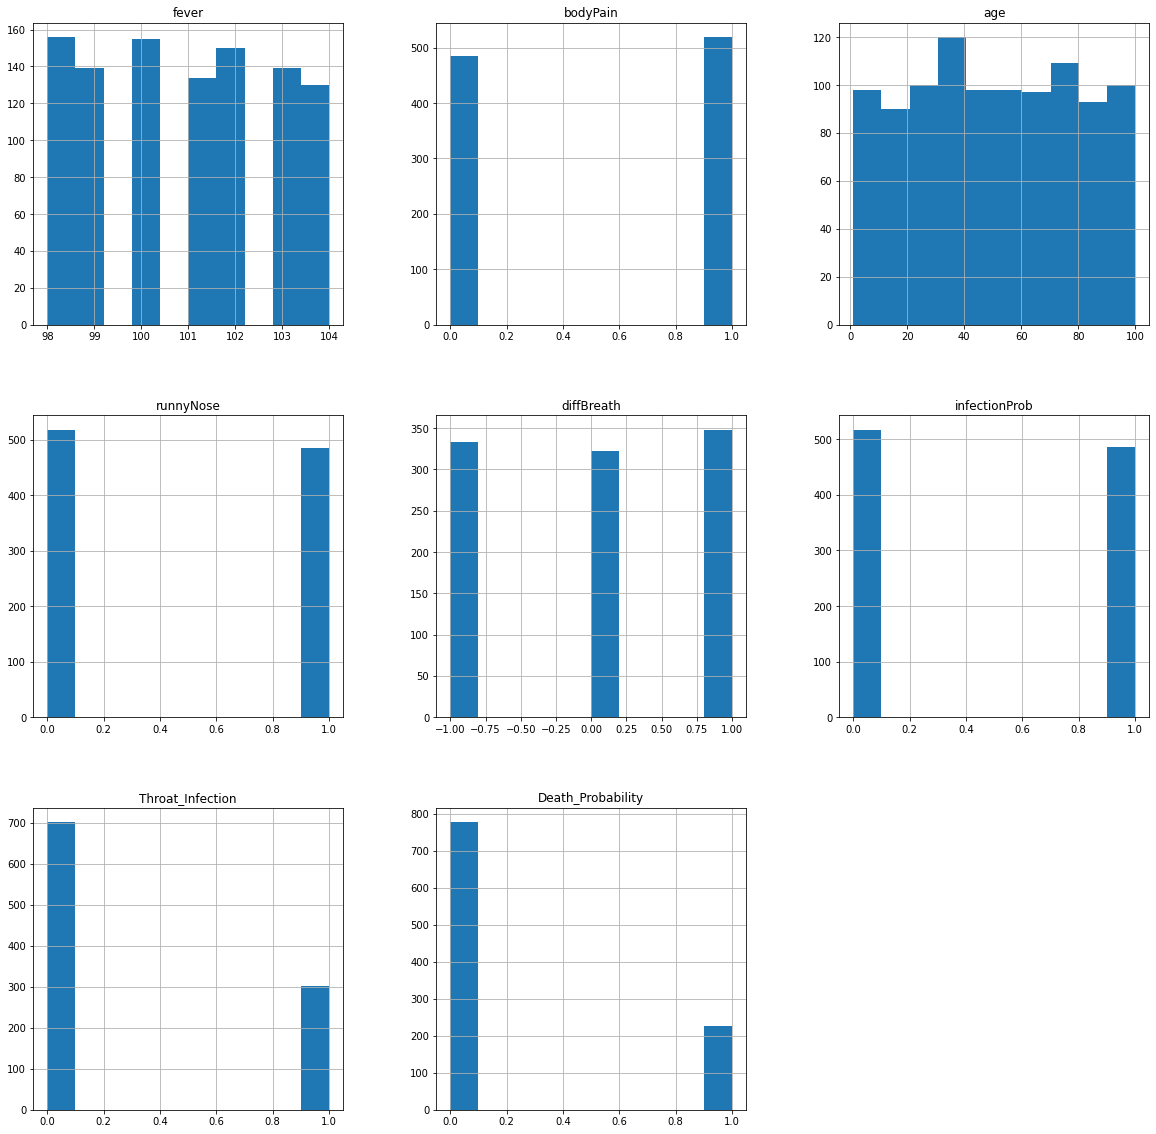

In [14]:
#Code to display histogram plot for all the columns in 'concat123_df'
concat123_df.hist(figsize=(20,20))

In [15]:
#imported the required libraries to generate barplot, piechart, catplot
import matplotlib.pyplot as plt
import seaborn as sns

#defined the function to generate barplot and reuse it as many times as needed.
def barplot(a,b,X,Y,title):
    plt.figure(figsize=(15, 8))
    plt.title(title, fontsize=30)
    plt.ylabel(Y, fontsize=20)
    plt.xlabel(X, fontsize=20)
    plt.xticks(rotation=90)
    plt.bar(b,a)
    plt.show()

#defined the function to generate piechart and reuse it as many times as needed.   
def draw_pie_chart(a, b,new_df):
    df = new_df[[a, b]]
    df= df.groupby([a]).agg({b: sum})
    df.plot.pie(y=b, figsize=(15, 15))
    
#defined the function to generate catplot and reuse it as many times as needed.    
def catplot(a,b,df):
    sns.catplot(x=a, y=b, data=df)

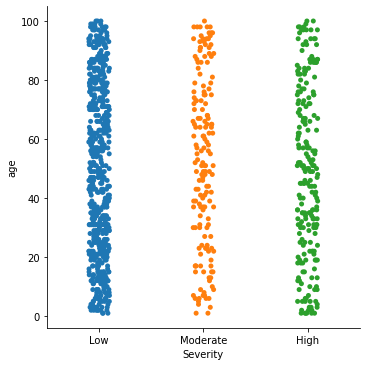

In [16]:
#Here df is dataframe, data1 feature is the X-axis and data2 feature is the Y-axis
#Referred/called catplot function implemented in the previous cell

df=concat123_df
data1="Severity"
data2="age"
catplot(data1,data2,df)

The above image describes the catplot between age vs severity. Catplot indicates that in majority cases have low severity by different age groups then follows the high and moderate serverity in terms of frequency of occurrence.

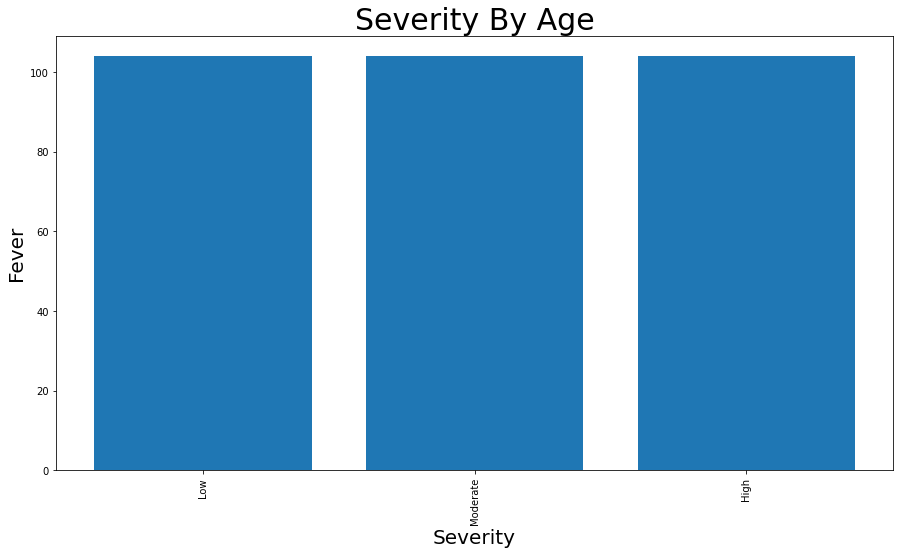

In [17]:
#Here data1 feature is the Y-axis and data2 feature is the X-axis
#X_axis and Y_axis are the strings that need to be displayed in X and Y-axis as labels. title is the name of the chart.
#Referred/called barplot function implemented in the previous cell

data1=concat123_df['fever']
data2=concat123_df['Severity']
X_axis="Severity"
Y_axis="Fever"
title="Severity By Age"
barplot(data1,data2,X_axis,Y_axis,title)

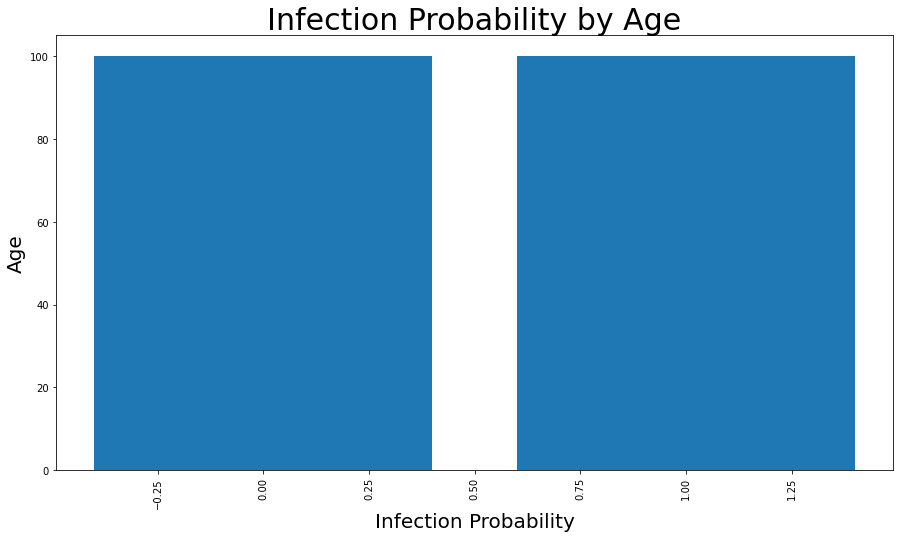

In [18]:
#Here data1 feature is the Y-axis and data2 feature is the X-axis
#X_axis and Y_axis are the strings that need to be displayed in X and Y-axis as labels. title is the name of the chart.
#Referred/called barplot function implemented in the previous cell

data1=concat123_df['age']
data2=concat123_df['infectionProb']
X_axis="Infection Probability"
Y_axis="Age"
title="Infection Probability by Age"
barplot(data1,data2,X_axis,Y_axis,title)

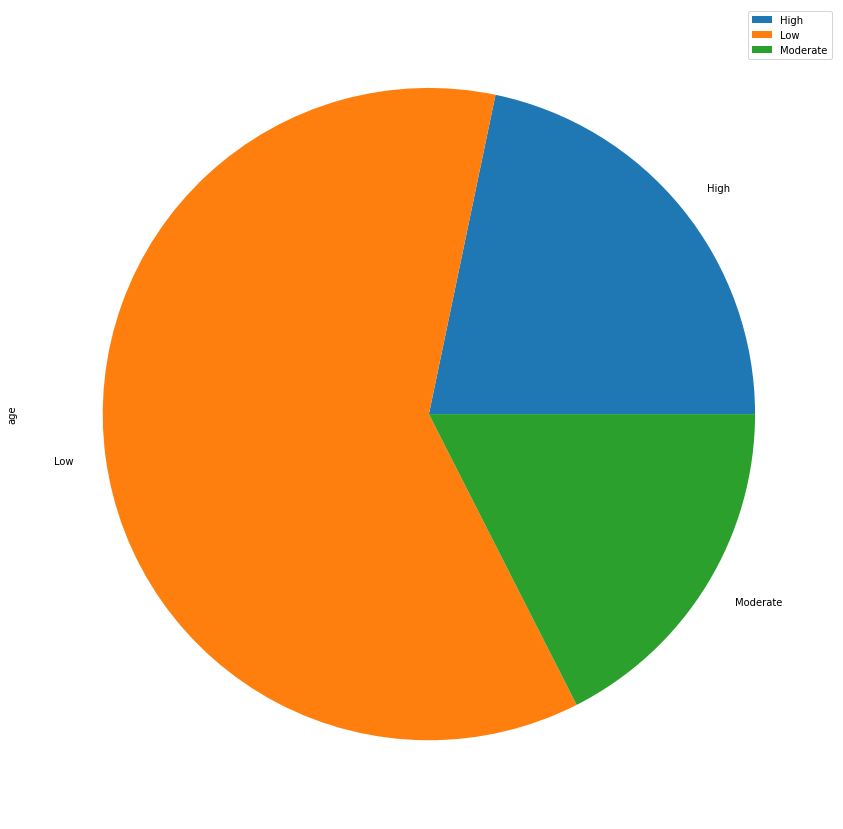

In [19]:
#Here data2 feature 'age' is added and grouped based on the data1 feature 'Severity'.
#Referred/called barplot function implemented in the previous cell
data1="Severity"
data2="age"
df=concat123_df
draw_pie_chart(data1,data2,df)

The above pie chart indicates the sum of age for each severity type.

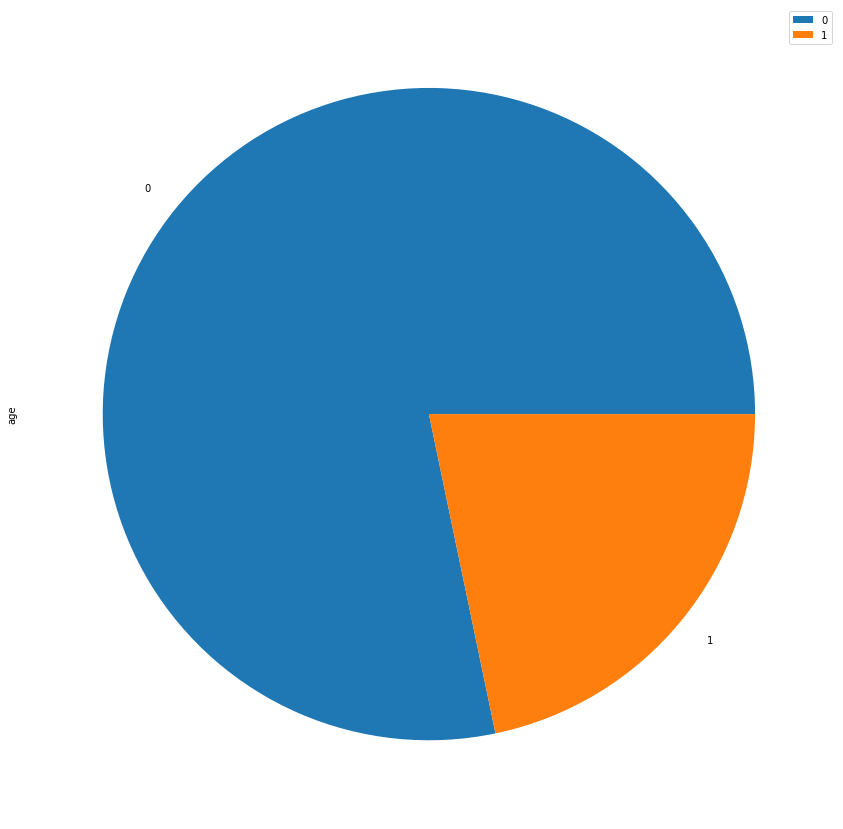

In [20]:
#Here data2 feature 'age' is added and grouped based on the data1 feature 'Severity'.
#Referred/called barplot function implemented in the previous cell
data1="Death_Probability"
data2="age"
df=concat123_df
draw_pie_chart(data1,data2,df)

The above pie chart indicates the sum of age for Death Probability indicator.

Here, I have created a class called Covid_19 and inside it functions like fever, infecSeverity and deathProb are defined.

Below are the conditions given inside the function fever- 1) if fever is less than or equal to 98 then the tempature is negligible/No temperature. 2) if fever is greater than or equal to 98 and less than or equal to 100 then the tempature is considered as normal. 3) if fever is greater than or equal to 100 then the temperature is high.

Below are the conditions given inside the function infecSeverity- 1) if age is less than or equal to 40 then the infection rate/Severity is low. 2) if age is greater than or equal to 40 and less than or equal to 48 then the infection rate/Severity is moderate. 3) if age is greater than or equal to 48 then the infection rate/Severity is high.

Below are the conditions given inside the function deathProb- 1) if severity is 'high' then the death probability is more. 2) if severity is 'moderate' then the death probability is minimal. 3) if severity is 'low' then the death probability is less.

In [21]:
class Covid_19:
    def __init__(self,n):
        self.covid = n
        
    def fever(self):
        if self.covid <=98 :
            return "No Temperature"
        elif self.covid >=98  and self.covid <=100 :
            return "Normal Temperature"
        elif self.covid >=100:
            return "High Temperature"
        
    def infecSeverity(self):
        if self.covid <=40 :
            return "Low Severity"
        elif self.covid >=40  and self.covid <=48 :
            return "Moderate Severity"
        elif self.covid >=48:
            return "High Severity"
        
    def deathProb(self):
        if self.covid =="high" :
            return "Danger for Life"
        elif self.covid =="moderate" :
            return "Need to be careful"
        elif self.covid =="low":
            return "No need to Worry"
        
   

In [22]:
# Here 're' library is imported.
# Below code used to call the functions defined in the previous cell based on user input. 
# Here we can choose/select function that user wants to execute.
import re
while(True):
    choose = input("""Please select from below options: 
                    1.Fever
                    2.Infection Severity
                    3.Death Probability
                     """ )
    if(not(re.findall("[1-3]",choose))):
        print("Select option from 1 to 3 numbers")
    else:
        break
try:

    if choose == "1":
        temp = Covid_19(int(input("Enter the temperature : ")))
        print(temp.fever())
    elif choose == "2":
        age = Covid_19(int(input("Enter the age : ")))
        print(age.infecSeverity())
    elif choose == "3":
        severity = Covid_19(input("Enter the Severity : "))
        print(severity.deathProb())
except:
    print("Error occured.")

Please select from below options: 
                    1.Fever
                    2.Infection Severity
                    3.Death Probability
                      2
Enter the age :  43


Moderate Severity


In [ ]:
a=input('''
Are you ready to submit your work?
1. Click the Save icon (or do Ctrl-S / Cmd-S)
2. Type "yes" or "no" below
3. Press Enter

''')

if a=='yes':
    !git add final.ipynb
    !git commit -a -m "Submitting the final.ipynb"
    !git push
else:
    print('''
    
OK. We can wait.
''')